In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

filename = ("https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Arrests.csv")
weed_df = pd.read_csv(filename)

weed_df = weed_df.drop(['Unnamed: 0'], axis = 1)

#### Part 1: Introduction – A brief summary of the type of data you’ve chosen to work with and the research question you hope to answer with it.

- Questions
    - What is the age distribution of people arrested?
        - By Gender?
        - By Race?
    - Is there a relationship between Race ('Colour') and 

## Part 2: Data Summary – Explain where you acquired your data from; how many use cases your data set provides; how many attributes are in each use case; what the data types are for each of the attributes; etc. (use cases = how many rows?)
- The data was collected from 5226 people (use cases) arrested in Toronto for possession of small quantities of marijuana between 1997 and 2002.
- There are 8 attributes: 'released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen', 'checks'.
- https://vincentarelbundock.github.io/Rdatasets/datasets.html
- https://vincentarelbundock.github.io/Rdatasets/doc/carData/Arrests.html

In [4]:
weed_df.shape

(5226, 8)

In [3]:
weed_df.columns

Index(['released', 'colour', 'year', 'age', 'sex', 'employed', 'citizen',
       'checks'],
      dtype='object')

In [2]:
weed_df.dtypes

released    object
colour      object
year         int64
age          int64
sex         object
employed    object
citizen     object
checks       int64
dtype: object

## Part 3: Exploratory Data Analysis (EDA) 
- Provide summary statistics for each attribute; 

In [6]:
weed_df['released'].describe()

count     5226
unique       2
top        Yes
freq      4334
Name: released, dtype: object

In [7]:
weed_df['colour'].describe()

count      5226
unique        2
top       White
freq       3938
Name: colour, dtype: object

In [10]:
weed_df['sex'].describe()

count     5226
unique       2
top       Male
freq      4783
Name: sex, dtype: object

In [11]:
weed_df['employed'].describe()

count     5226
unique       2
top        Yes
freq      4111
Name: employed, dtype: object

In [12]:
weed_df['citizen'].describe()

count     5226
unique       2
top        Yes
freq      4455
Name: citizen, dtype: object

In [8]:
weed_df['year'].describe()

count    5226.000000
mean     1999.509376
std         1.390056
min      1997.000000
25%      1998.000000
50%      2000.000000
75%      2001.000000
max      2002.000000
Name: year, dtype: float64

In [9]:
weed_df['age'].describe()

count    5226.000000
mean       23.846537
std         8.316133
min        12.000000
25%        18.000000
50%        21.000000
75%        27.000000
max        66.000000
Name: age, dtype: float64

In [13]:
weed_df['checks'].describe()

count    5226.000000
mean        1.636433
std         1.539230
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         6.000000
Name: checks, dtype: float64

- provide appropriate graphical analysis for each attribute using both Matplotlib and Seaborn. For example, if you believe it is appropriate to generate a histogram for a particular variable as part of your EDA, create it first using Matplotlib and then once again using Seaborn. Include a narrative describing your EDA findings.

Matplotlib:

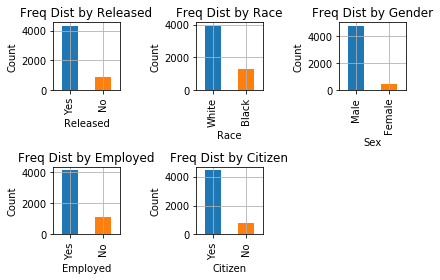

In [14]:
# Create sublot 1 containing bar plot for released
plt.subplot(231)
released = weed_df['released']
realeasedbar = released.value_counts().plot.bar(title = "Freq Dist by Released")
plt.xlabel("Released")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 2 containing bar plot for Race
plt.subplot(232)
colour = weed_df['colour']
colourbar = colour.value_counts().plot.bar(title = "Freq Dist by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Gender
plt.subplot(233)
sex = weed_df['sex']
sexbar = sex.value_counts().plot.bar(title = "Freq Dist by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Employed
plt.subplot(234)
employed = weed_df['employed']
employedbar = employed.value_counts().plot.bar(title = "Freq Dist by Employed")
plt.xlabel("Employed")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Citizen
plt.subplot(235)
citizen = weed_df['citizen']
citizenbar = citizen.value_counts().plot.bar(title = "Freq Dist by Citizen")
plt.xlabel("Citizen")
plt.ylabel("Count")
plt.grid(True)

# adjust subplots to fit properly
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.95, hspace=0.4,
                    wspace=0.5)
plt.tight_layout()

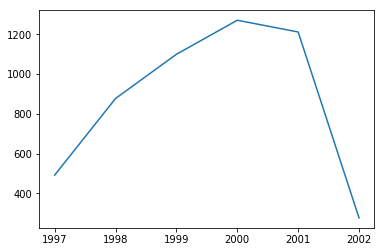

In [16]:
years = weed_df['year'].unique()
years.sort()
#years
## https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.sort.html

counts = weed_df['year'].value_counts().sort_index()
#counts
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

plt.plot(years, counts)

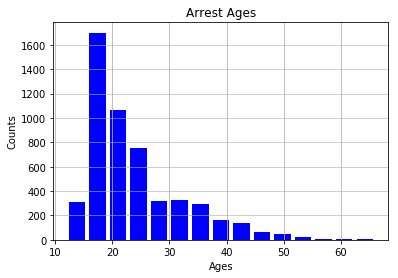

In [20]:
# select age from dataframe
age = weed_df['age']
# Histogram of number of arrests for each age over all years
age.plot.hist(grid=True, bins=15, rwidth=0.8, color='b')
plt.title('Arrest Ages')
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

Seaborn:

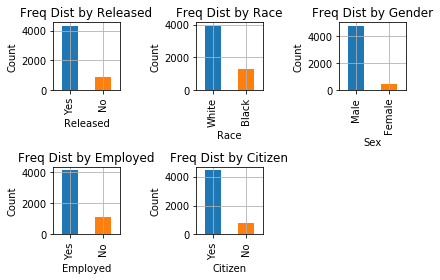

In [15]:
# Create sublot 1 containing bar plot for released
plt.subplot(231)
released = weed_df['released']
realeasedbar = released.value_counts().plot.bar(title = "Freq Dist by Released")
plt.xlabel("Released")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 2 containing bar plot for Race
plt.subplot(232)
colour = weed_df['colour']
colourbar = colour.value_counts().plot.bar(title = "Freq Dist by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Gender
plt.subplot(233)
sex = weed_df['sex']
sexbar = sex.value_counts().plot.bar(title = "Freq Dist by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Employed
plt.subplot(234)
employed = weed_df['employed']
employedbar = employed.value_counts().plot.bar(title = "Freq Dist by Employed")
plt.xlabel("Employed")
plt.ylabel("Count")
plt.grid(True)

# Create sublot 1 containing bar plot for Citizen
plt.subplot(235)
citizen = weed_df['citizen']
citizenbar = citizen.value_counts().plot.bar(title = "Freq Dist by Citizen")
plt.xlabel("Citizen")
plt.ylabel("Count")
plt.grid(True)

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.05, right=0.95, hspace=0.4,
                    wspace=0.5)
plt.tight_layout()

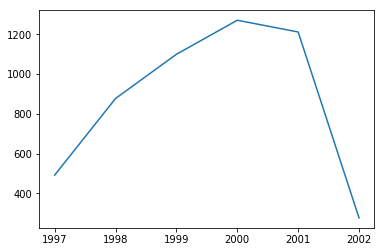

In [17]:
years = weed_df['year'].unique()
years.sort()
#years

## https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.sort.html

counts = weed_df['year'].value_counts().sort_index()
#counts
## https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

counts.plot()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


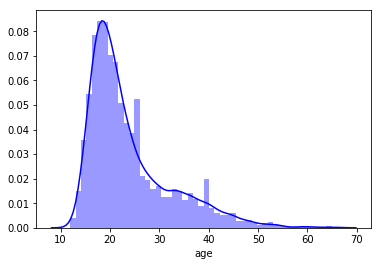

In [18]:
sns.distplot(weed_df['age'], color="b")

#### Part 4: Inference – Perform whatever analysis is necessary to answer your research question. Your analysis should include at least one graphic, and for each graphic you create you must do so using both Matplotlib and Seaborn (as described in Part 3 above). Include a narrative explaining your research approach and findings.

I have been tasked in investigating if there are any defining trends that can be found as to who the forces focus should be on in order to better the sittuation.

Some questions I have decided to ask in this research are:
- Has there been a change in number of arrests over time?
- Has there been a change in the ages of those arrested over time?
- Which gender has more arrests? Which race?
    - Out of those how many where citizens? 
    - How many were employed?

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


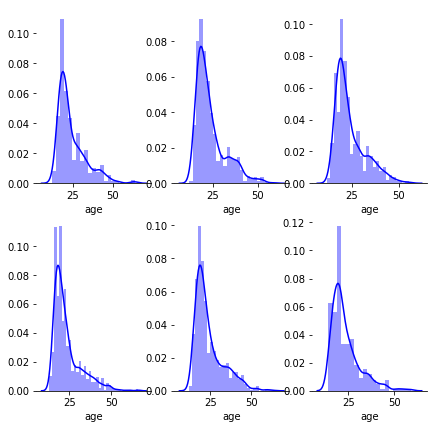

In [21]:
# select age from dataframe
age = weed_df['age']

# create dataframe with only 1997 data
age1997 = weed_df[weed_df['year'] == 1997]
age1997 = age1997['age']
#age1997

# create dataframe with only 1998 data
age1998 = weed_df[weed_df['year'] == 1998]
age1998 = age1998['age']
#age1998

# create dataframe with only 1999 data
age1999 = weed_df[weed_df['year'] == 1999]
age1999 = age1999['age']
#age1999

# create dataframe with only 2000 data
age2000 = weed_df[weed_df['year'] == 2000]
age2000 = age2000['age']
#age2000

# create dataframe with only 2001 data
age2001 = weed_df[weed_df['year'] == 2001]
age2001 = age2001['age']
#age2001

# create dataframe with only 2002 data
age2002 = weed_df[weed_df['year'] == 2002]
age2002 = age2002['age']
#age2002

f, axes = plt.subplots(2, 3, figsize=(7, 7), sharex=False)
sns.despine(left=True)

sns.distplot(age1997, color="b", ax=axes[0, 0])
sns.distplot(age1998, color="b", ax=axes[0, 1])
sns.distplot(age1999, color="b", ax=axes[0, 2])
sns.distplot(age2000, color="b", ax=axes[1, 0])
sns.distplot(age2001, color="b", ax=axes[1, 1])
sns.distplot(age2002, color="b", ax=axes[1, 2])   

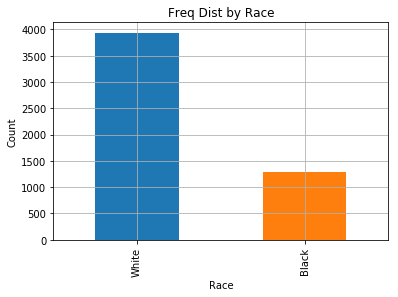

In [22]:
colour = weed_df['colour']
colourbar = colour.value_counts().plot.bar(title = "Freq Dist by Race")
plt.xlabel("Race")
plt.ylabel("Count")
plt.grid(True)

In [26]:
male = weed_df[weed_df['colour' & weed_df['sex'] == "Male"]

SyntaxError: unexpected EOF while parsing (<ipython-input-26-adbec85cbd46>, line 1)

#### Part 5: Conclusion – A brief, concise narrative explaining your conclusions.

- Has there been a change in number of arrests over time?
    - Based off the line graph it would seem that arrests have been increasing, since the drop from 2001 - 2002 is so large must assume that the data from 2002 is not a complete year, therefore it would seem that the number of arrests would again increase by the end of 2002.
- Has there been a change in the ages of those arrested over time?
    - There appears to not be a change in age of those who are arrested over the given years. In all years, the age curve is skewed right and remains highest among those in there late teens and twenties.
- Which gender has more arrests? Which race?
    - Out of those how many where citizens? 
    - How many were employed?

Sources:
- https://matplotlib.org/users/pyplot_tutorial.html
- https://www.youtube.com/results?search_query=SUBPLOTS+SEABORN
- https://seaborn.pydata.org/examples/distplot_options.html